In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacepy
import os
from uncertainties import ufloat, unumpy
import datetime as dt
import copy
import seaborn as sns
import geopandas as gpd

%load_ext autoreload
%autoreload 2

import SpaceCherenkovSimulator.spectra_running_tools as SRT

import sketch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def save_figure_for_paper(file_name:str):

    path_to_paper_folder = "../../../../windowsHomeDir/University of Surrey/HEPI - General/HEPI/WP5000/HEPI background paper files/"

    plt.savefig(path_to_paper_folder + file_name + ".png", bbox_inches="tight",dpi=500)
    plt.savefig(path_to_paper_folder + file_name + ".eps", bbox_inches="tight",dpi=500)

In [8]:
def fill_between_errorbar(x_vals,y_vals,y_err,**kwargs):

    plt.plot(x_vals,
            y_vals,
            marker="o",
            ms=3,
            **kwargs)
    plt.fill_between(x_vals,
                np.array(y_vals) - np.array(y_err),
                np.array(y_vals) + np.array(y_err),
                color=plt.gca().lines[-1].get_color(),
                alpha=0.4)

In [9]:
spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)
spacecraft_coords_DF.columns = ['ModifiedJulianDay',
'Altitude_km',
'Latitude_deg',
'Longitude_deg',
'LocalTime_hrs',
'PitchAngle_deg']
spacecraft_coords_DF

/tmp/ipykernel_4800/1845830959.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)


,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


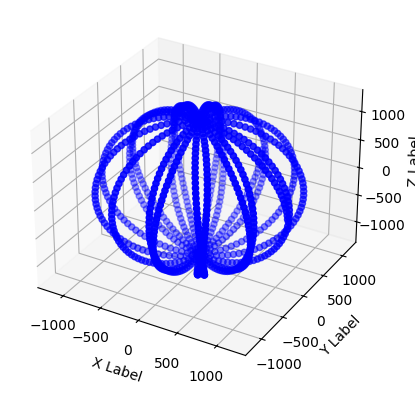

In [10]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# get the data from the dataframe
index = spacecraft_coords_DF.index
ModifiedJulianDay = spacecraft_coords_DF['ModifiedJulianDay']
Altitude_km = spacecraft_coords_DF['Altitude_km']
Latitude_deg = spacecraft_coords_DF['Latitude_deg']
Longitude_deg = spacecraft_coords_DF['Longitude_deg']
LocalTime_hrs = spacecraft_coords_DF['LocalTime_hrs']
PitchAngle_deg = spacecraft_coords_DF['PitchAngle_deg']

# convert coordinates to Cartesian 
x = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.cos(np.radians(Longitude_deg)) 
y = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.sin(np.radians(Longitude_deg)) 
z = Altitude_km * np.sin(np.radians(Latitude_deg)) 

# plot the trajectory in 3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, c='b', marker='o') 
ax.set_xlabel('X Label') 
ax.set_ylabel('Y Label') 
ax.set_zlabel('Z Label') 
plt.show() 

In [11]:
IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)
IRENE8_450_electrons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.04,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    1,
    1.25,
    1.5,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    3.75,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
    6,
    6.5,
    7
]
IRENE8_450_electrons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_electrons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_electrons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_electrons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_electrons

/tmp/ipykernel_4800/3684036918.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,3.75,4,4.25,4.5,4.75,5,5.5,6,6.5,7
0,0.000000,354.938757,1537300.0,1209300.0,750380.0,339930.0,112420.0,37182.0,19539.0,10268.0,...,1.6375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.313331,354.688073,729880.0,574970.0,363090.0,168080.0,57040.0,19357.0,10406.0,5594.3,...,1.5384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.626412,354.437390,387980.0,307940.0,198260.0,94564.0,33416.0,11808.0,6514.8,3594.5,...,1.9403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.939000,354.186707,287760.0,228280.0,146830.0,69917.0,24649.0,8689.6,4788.0,2638.2,...,1.4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.250860,353.936025,201860.0,159250.0,98662.0,45200.0,15312.0,5187.2,2785.8,1496.1,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)
IRENE8_450_protons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.1, 
    0.15, 
    0.2, 
    0.3, 
    0.4, 
    0.5, 
    0.6, 
    0.7, 
    1, 
    1.5, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    10, 
    15, 
    20, 
    30, 
    40, 
    50, 
    60, 
    70, 
    100, 
    150, 
    200, 
    300, 
    400
]
IRENE8_450_protons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_protons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_protons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_protons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_protons

/tmp/ipykernel_4800/382106000.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,...,30,40,50,60,70,100,150,200,300,400
0,0.000000,354.938757,3519.5,3504.1,3488.7,3475.4,3462.1,3454.2,3446.3,3433.0,...,2518.5,2347.60,2188.30,2031.70,1895.40,1531.80,1041.00,707.42,306.64,132.920
1,3.313331,354.688073,3141.3,3132.8,3124.2,3116.3,3108.4,3103.5,3098.7,3090.8,...,2391.8,2236.00,2090.30,1951.90,1828.90,1496.40,1042.50,726.23,326.90,147.150
2,6.626412,354.437390,2742.0,2735.6,2729.2,2722.8,2716.5,2713.4,2710.2,2703.9,...,2159.3,2025.00,1899.10,1778.70,1671.70,1378.60,971.83,685.09,312.98,142.980
3,9.939000,354.186707,2032.5,2024.1,2015.7,2007.3,1999.0,1996.7,1994.3,1985.9,...,1613.9,1523.00,1437.10,1345.80,1268.50,1051.80,740.84,521.84,233.21,104.220
4,13.250860,353.936025,1320.5,1316.1,1311.8,1307.1,1302.4,1297.0,1291.6,1283.5,...,1050.0,991.75,936.75,881.96,831.92,691.92,480.22,333.29,140.57,59.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000


In [13]:
pd.read_csv("cxb_moretti_new.dat",delimiter=" ").plot("energy(keV)","count/cm^2/sr/s/keV")
plt.yscale("log")
plt.xscale("log")

FileNotFoundError: [Errno 2] No such file or directory: 'cxb_moretti_new.dat'

In [9]:
cxb_moretti_DF = pd.read_csv("cxb_moretti_new.dat",delimiter=" ")
cxb_moretti_DF["energy(MeV)"] = cxb_moretti_DF["energy(keV)"] / 1000
cxb_moretti_DF["count/cm^2/s/MeV"] = cxb_moretti_DF["count/cm^2/sr/s/keV"] * 1000 * np.pi / 2 #need to divide by 2, because the CXB will be obscured by Earth
cxb_moretti_DF_formatted_differential = cxb_moretti_DF[["energy(MeV)","count/cm^2/s/MeV"]].transpose()
cxb_moretti_DF_formatted_differential.columns = cxb_moretti_DF_formatted_differential.iloc[0]
cxb_moretti_DF_formatted_differential.drop("energy(MeV)",inplace=True)
cxb_moretti_DF_formatted_differential.reset_index(drop=True,inplace=True)
#cxb_moretti_DF_formatted_differential = pd.concat([pd.DataFrame({"Latitude_deg":[0.0],"Longitude_deg":[0.0]}),cxb_moretti_DF_formatted_differential],axis=1)
cxb_moretti_DF_formatted_differential = pd.concat([IRENE8_450_protons[["Latitude_deg","Longitude_deg"]],cxb_moretti_DF_formatted_differential],axis=1)
cxb_moretti_DF_formatted_differential.fillna(method="ffill",inplace=True)
cxb_moretti_DF_formatted_differential

,Latitude_deg,Longitude_deg,0.0010115911122238297,0.0010233165783302446,0.0010351779556301763,0.0010471768194855202,0.00105931476351837,0.0010715933998226713,0.001084014359178331,0.0010965792912678099,...,89.11482322840203,90.14776314524914,91.19267598459297,92.24970052592174,93.31897715733238,94.40064789417603,95.49485639791966,96.60174799522643,97.72146969725725,98.85417021919571
0,0.000000,354.938757,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
1,3.313331,354.688073,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
2,6.626412,354.437390,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
3,9.939000,354.186707,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
4,13.250860,353.936025,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
1089,-10.059640,81.942378,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
1090,-6.747288,81.691850,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07
1091,-3.434439,81.441319,234472.062637,230691.933278,226972.285291,223312.150787,219710.577367,216166.62788,212679.380173,209247.926858,...,1.943585e-07,1.880136e-07,1.818758e-07,1.759384e-07,1.701948e-07,1.646386e-07,1.592639e-07,1.540647e-07,1.490351e-07,1.441698e-07


In [10]:
def get_albedo_gamma_flux(energy_in_MeV:float):
    
    # model taken from https://www.academia.edu/58345520/A_compact_instrument_for_gamma_ray_burst_detection_on_a_CubeSat_platform_I?email_work_card=thumbnail

    C = 0.0080

    energy_in_keV = energy_in_MeV * 1000.0

    if energy_in_MeV < 1:
        output_flux = C/(((energy_in_keV / 44.0)**(-5)) + (energy_in_keV / 44.0)**(1.4))
    elif (1 <= energy_in_MeV) and (energy_in_MeV < 20):
        output_flux = 1.01e-4 * ((energy_in_keV/1000.0)**(-1.34))
    else:
        output_flux = 7.29e-4 * ((energy_in_keV/1000.0)**(-2.0))

    output_flux_corrected_units = output_flux * 1000 * np.pi # converting to units of count/cm^2/s/MeV

    return output_flux_corrected_units

    

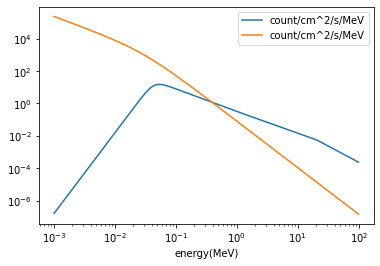

In [11]:
albedo_gamma_DF = pd.DataFrame()
albedo_gamma_DF["energy(MeV)"] = cxb_moretti_DF["energy(MeV)"].copy()
albedo_gamma_DF["count/cm^2/s/MeV"] = albedo_gamma_DF["energy(MeV)"].apply(get_albedo_gamma_flux)


albedo_gamma_DF_formatted_differential = albedo_gamma_DF[["energy(MeV)","count/cm^2/s/MeV"]].transpose()
albedo_gamma_DF_formatted_differential.columns = albedo_gamma_DF_formatted_differential.iloc[0]
albedo_gamma_DF_formatted_differential.drop("energy(MeV)",inplace=True)
albedo_gamma_DF_formatted_differential.reset_index(drop=True,inplace=True)
#albedo_gamma_DF_formatted_differential = pd.concat([pd.DataFrame({"Latitude_deg":[0.0],"Longitude_deg":[0.0]}),albedo_gamma_DF_formatted_differential],axis=1)
albedo_gamma_DF_formatted_differential = pd.concat([IRENE8_450_protons[["Latitude_deg","Longitude_deg"]],albedo_gamma_DF_formatted_differential],axis=1)
albedo_gamma_DF_formatted_differential.fillna(method="ffill",inplace=True)
albedo_gamma_DF_formatted_differential


albedo_gamma_DF.plot("energy(MeV)","count/cm^2/s/MeV")
cxb_moretti_DF.plot("energy(MeV)","count/cm^2/s/MeV",ax=plt.gca())

plt.xscale("log")
plt.yscale("log")

In [20]:
def convert_integral_values_to_differential(integral_DF):

    differential_DF_coords = integral_DF.iloc[:,:2]

    differential_DF_energy_vals = (integral_DF.iloc[:,2:-1].columns +integral_DF.iloc[:,3:].columns)/2
    differential_DF_values = -1 * integral_DF.iloc[:,2:].diff(axis=1).iloc[:,1:] / np.diff(integral_DF.iloc[:,2:].columns)
    differential_DF_values.columns = differential_DF_energy_vals

    return pd.concat([differential_DF_coords,differential_DF_values],axis=1)

In [21]:
IRENE8_450_electrons_differential = convert_integral_values_to_differential(IRENE8_450_electrons)
IRENE8_450_protons_differential = convert_integral_values_to_differential(IRENE8_450_protons)

In [22]:
IRENE8_450_electrons_differential_shortened = IRENE8_450_electrons_differential.drop(columns=IRENE8_450_electrons_differential.columns[2:11])

In [23]:
IRENE8_450_electrons_differential_shortened

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
0,0.000000,354.938757,5039.2,2607.72,922.28,618.24,504.52,302.04,199.78,111.164,...,18.7532,6.55,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.313331,354.688073,2716.08,1416.32,498.24,337.44,286.28,170.52,113.232,62.176,...,11.3468,6.1536,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,6.626412,354.437390,1774.0,945.88,337.76,232.16,201.908,122.04,82.488,45.996,...,7.4096,7.7612,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,9.939000,354.186707,1300.24,692.28,246.88,169.56,147.344,88.964,60.068,33.452,...,5.3692,5.6092,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,13.250860,353.936025,725.48,378.56,133.744,90.44,76.012,45.424,30.2536,16.6852,...,4.7284,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [24]:
IRENE8_450_electrons_differential_shortened.iloc[843]["Latitude_deg"]

np.float64(-79.1385)

In [25]:
IRENE8_450_protons_differential

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.65,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
0,0.000000,354.938757,308.0,308.0,133.0,133.0,79.0,79.0,133.0,101.0,...,26.54,17.09,15.93,15.66,13.63,12.12,9.816,6.6716,4.0078,1.7372
1,3.313331,354.688073,170.0,172.0,79.0,79.0,49.0,48.0,79.0,74.666667,...,21.68,15.58,14.57,13.84,12.3,11.083333,9.078,6.3254,3.9933,1.7975
2,6.626412,354.437390,128.0,128.0,64.0,63.0,31.0,32.0,63.0,61.333333,...,18.34,13.43,12.59,12.04,10.7,9.77,8.1354,5.7348,3.7211,1.7
3,9.939000,354.186707,168.0,168.0,84.0,83.0,23.0,24.0,84.0,57.333333,...,14.36,9.09,8.59,9.13,7.73,7.223333,6.2192,4.38,2.8863,1.2899
4,13.250860,353.936025,88.0,86.0,47.0,47.0,54.0,54.0,81.0,72.666667,...,7.95,5.825,5.5,5.479,5.004,4.666667,4.234,2.9386,1.9272,0.81285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [19]:
def get_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [17]:
index_for_horns_max = 839
index_for_SAA_max = 826
index_for_polar = 847

In [18]:
SRT.default_shielding_geometry

In [16]:
class orbital_run():

    def __init__(self, 
                 DF_of_coordinates_and_spectra:pd.DataFrame, 
                 particle_species:str, 
                 shielding_geometry=SRT.default_shielding_geometry,
                 label=None,
                 label_for_run=None,
                 threshold_photon_value=10.0,
                 number_of_particles_to_simulate=100_000):
        
        self.run_dict = {}

        self.label = label

        self.DF_of_coordinates_and_spectra = DF_of_coordinates_and_spectra

        for index, spectrum_row in DF_of_coordinates_and_spectra.iterrows():

            self.run_dict[index] = self.run_Cherenkov_simulation_across_row(particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row)

        self.run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

    def run_Cherenkov_simulation_across_row(self, particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row):
        
        file_path_to_use = f"file_path_for_spectrum_row.csv"

        spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

        max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

        if max_particles_per_s > 0.0:

            row_as_a_spectrum = SRT.particle_spectrum(particle_species=SRT.particle(particle_species),
                                                        spectrum_file_path=file_path_to_use,
                                                        incoming_particles_per_s_per_cm2=max_particles_per_s)
                                                        
            Cherenkov_run_for_row = SRT.wrapper_gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
                                                shielding_geometry,
                                                #SRT.no_shielding_geometry,
                                                Cherenkov_run_label = label_for_run,
                                                number_of_particles=number_of_particles_to_simulate);

        else:
            Cherenkov_run_for_row = ufloat(0.0,0.0)

        os.remove(file_path_to_use)
        return Cherenkov_run_for_row

    def plot_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.run_dict_event_counts.apply(lambda x:x.n),
                self.run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def __add__(self, right):

        output_orbital_run = copy.deepcopy(self)

        output_orbital_run.run_dict = {0:self.run_dict, 1:right.run_dict}

        output_orbital_run.run_dict_event_counts = self.run_dict_event_counts + right.run_dict_event_counts
        output_orbital_run.label = self.label + " plus " + right.label

        return output_orbital_run

    def print_count_rates_info(self):

        print(f"polar region count rate: {self.run_dict_event_counts[index_for_polar]} cts/s".replace("+/-","±"))
        print(f"horns region count rate: {self.run_dict_event_counts[index_for_horns_max]} cts/s".replace("+/-","±"))
        print(f"SAA region count rate: {self.run_dict_event_counts[index_for_SAA_max]} cts/s".replace("+/-","±"))

In [ ]:
IRENE8_450_electrons_differential_shortened_single_orbit = IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
                                               particle_species="e-",label="AE8 electrons",threshold_photon_value=20.0, number_of_particles_to_simulate=100_000)

/tmp/ipykernel_4800/1848172525.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/home/xisacross/programming/SpaceCherenkovSimulator/.venv/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7ff6bc266180>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7ff6bd43ac90>, Cherenkov_run_label=None, number_of_particles=100000)


ParserError: Empty CSV file

In [30]:
IRENE8_450_protons_differential_single_orbit = IRENE8_450_protons_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit, particle_species="proton",
                                             number_of_particles_to_simulate=1_000_000,label="AP8 protons",threshold_photon_value=20.0)

________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7ff6ac33c170>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7ff6bd43ac90>, Cherenkov_run_label=None, number_of_particles=1000000)


/tmp/ipykernel_4800/1848172525.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


ParserError: Empty CSV file

In [24]:
CXB_photons_orbital_run = orbital_run(cxb_moretti_DF_formatted_differential.iloc[790:850].sample(60,random_state=1).sort_index(), particle_species="gamma",
                                             number_of_particles_to_simulate=10_000_000,label="CXB gammas",threshold_photon_value=20.0)

polar region count rate: 0.021±0.007 cts/s
horns region count rate: 0.021±0.007 cts/s
SAA region count rate: 0.021±0.007 cts/s


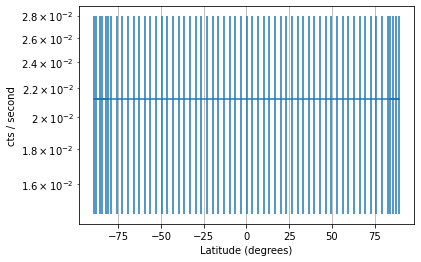

In [25]:
CXB_photons_orbital_run.print_count_rates_info()

CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

In [26]:
dir(CXB_photons_orbital_run.run_dict[790])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


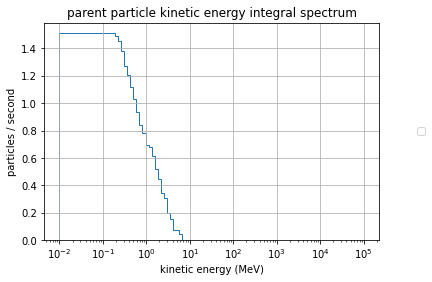

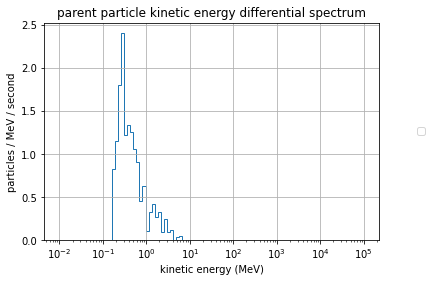

In [27]:
CXB_photons_orbital_run.run_dict[790].outputted_tuple.plot_integral_primary_spectra()
plt.figure()
CXB_photons_orbital_run.run_dict[790].outputted_tuple.plot_differential_primary_spectra()

In [28]:
albedo_photons_orbital_run = orbital_run(albedo_gamma_DF_formatted_differential.iloc[790:850].sample(60,random_state=1).sort_index(), particle_species="gamma",
                                             number_of_particles_to_simulate=100_000,label="albedo gammas",threshold_photon_value=20.0)

polar region count rate: 0.336±0.021 cts/s
horns region count rate: 0.336±0.021 cts/s
SAA region count rate: 0.336±0.021 cts/s


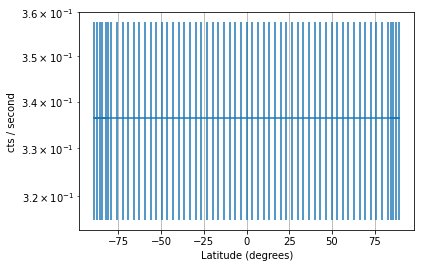

In [29]:
albedo_photons_orbital_run.print_count_rates_info()

albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


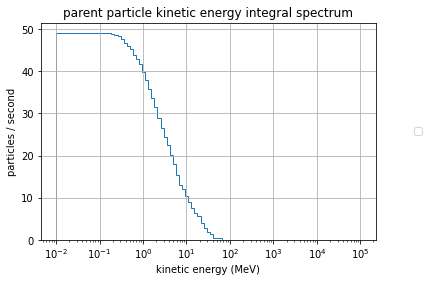

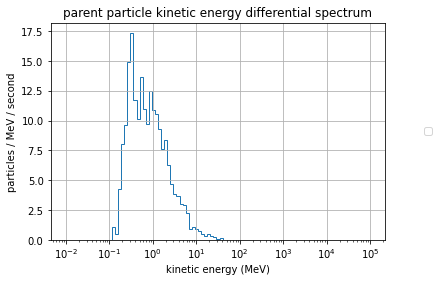

In [30]:
albedo_photons_orbital_run.run_dict[790].outputted_tuple.plot_integral_primary_spectra()
plt.figure()
albedo_photons_orbital_run.run_dict[790].outputted_tuple.plot_differential_primary_spectra()

In [31]:
index_for_horns_max

839

In [32]:
IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:]

Index([1.125, 1.375, 1.625, 1.875, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375,
       3.625, 3.875, 4.125, 4.375, 4.625, 4.875,  5.25,  5.75,  6.25,  6.75],
      dtype='object')

Text(0, 0.5, 'particles / second / cm2 / MeV')

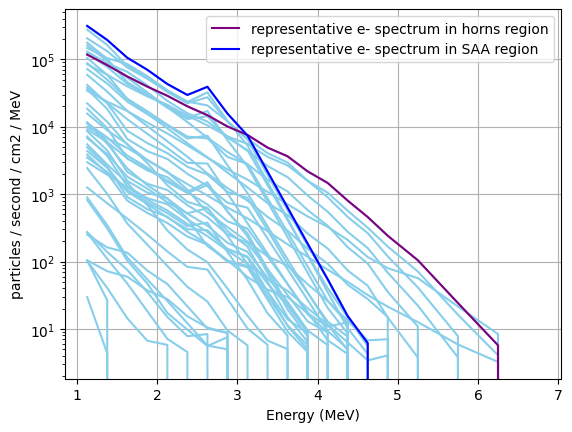

In [27]:
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit.values[:,2:]),color="skyblue")
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max].values[:,2:]),
        color="purple",label="representative e- spectrum in horns region")
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max].values[:,2:]),
        color="blue",label="representative e- spectrum in SAA region")
plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2 / MeV")

Text(0, 0.5, 'particles / second / cm2')

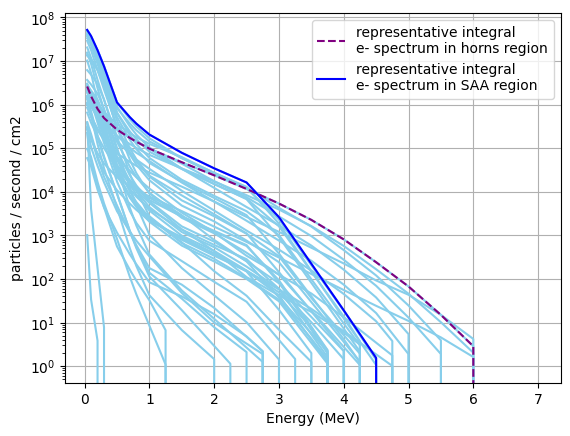

In [37]:
plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().values[:,2:]),color="skyblue")
plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_horns_max].values[:,2:]),
        color="purple",label="representative integral\ne- spectrum in horns region",ls="--")
plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_SAA_max].values[:,2:]),
        color="blue",label="representative integral\ne- spectrum in SAA region")
plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2")

Text(0, 0.5, 'particles / second / cm2 / MeV')

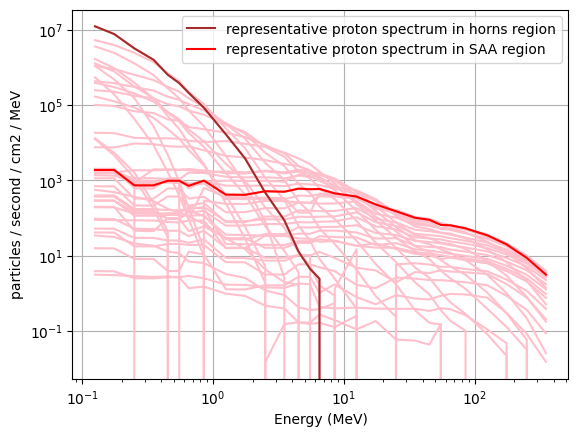

In [38]:
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit.values[:,2:]),color="pink")
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_horns_max].values[:,2:]),
        color="brown",label="representative proton spectrum in horns region")
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].values[:,2:]),
        color="red",label="representative proton spectrum in SAA region")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2 / MeV")

Text(0, 0.5, 'particles / second / cm2')

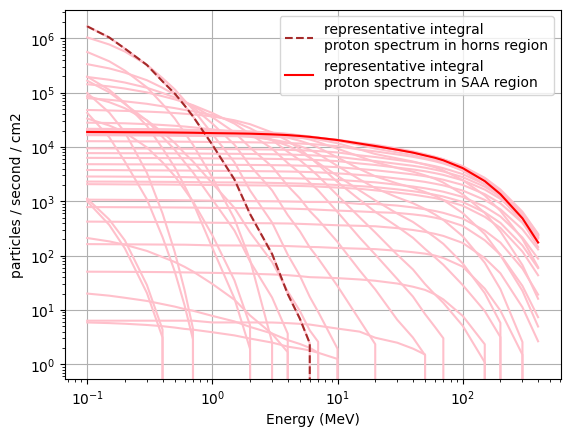

In [39]:
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().values[:,2:]),color="pink")
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_horns_max].values[:,2:]),
        color="brown",label="representative integral\nproton spectrum in horns region",ls="--")
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_SAA_max].values[:,2:]),
        color="red",label="representative integral\nproton spectrum in SAA region")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2")

In [37]:
IRENE8_450_electrons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.33±0.24)e+03 cts/s
SAA region count rate: (2.5±1.4)e+02 cts/s


In [38]:
IRENE8_450_protons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (0±7)e+01 cts/s
SAA region count rate: 95±10 cts/s


In [39]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.33±0.25)e+03 cts/s
SAA region count rate: (3.5±1.4)e+02 cts/s


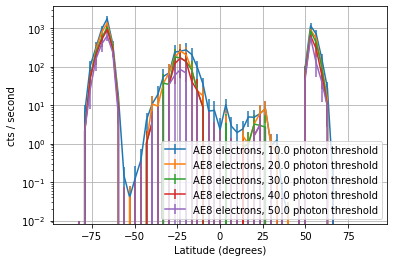

In [40]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, particle_species="e-",label=f"AE8 electrons, {photon_threshold} photon threshold",threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes")
plt.legend()

(830.0, 850.0)

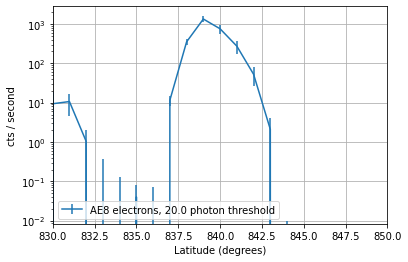

In [41]:
for photon_threshold in [20.0]:
    test_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, particle_species="e-",label=f"AE8 electrons, {photon_threshold} photon threshold",threshold_photon_value=photon_threshold)
    test_orbital_run.plot_run_dict()
plt.legend()
plt.xlim([830,850])

In [42]:
max(test_orbital_run.run_dict_event_counts)

1333.1860067801126+/-235.67621649430805

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


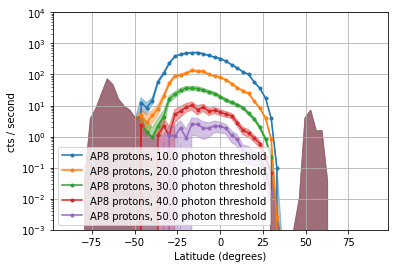

In [113]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_protons_differential_single_orbit, particle_species="proton",
                                                number_of_particles_to_simulate=1_000_000,
                                                label=f"AP8 protons, {photon_threshold} photon threshold",
                                                threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes", 
                                                error_bar_function=fill_between_errorbar)
plt.legend()
plt.ylim([1e-3,1e4])
save_figure_for_paper("Proton_with_threshold")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


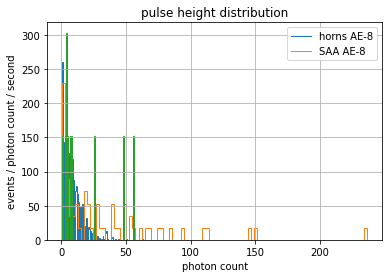

In [44]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

plt.legend(["horns AE-8","SAA AE-8"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


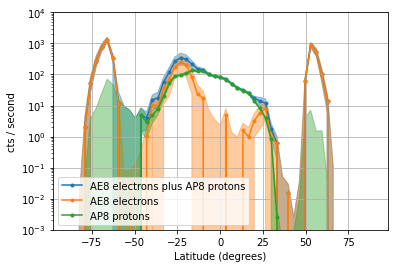

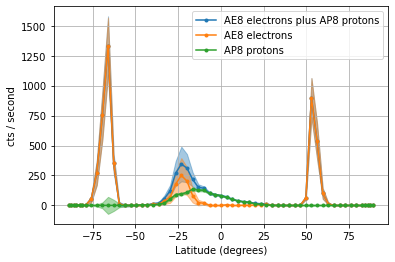

In [112]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
plt.legend()
#plt.legend(["total","electrons","protons"])
save_figure_for_paper("HEPI_background_output")
plt.ylim([1e-3,1e4])

plt.figure()
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
#plt.legend(["total","electrons","protons"])
plt.legend()
plt.yscale("linear")

In [46]:
default_rigidities = np.concatenate([[0,1,2,3,4],np.linspace(5,20,5)])

In [47]:
test_spectrum = pd.read_json("GLE05spectrum_multipliedby1.json")[pd.read_json("GLE05spectrum_multipliedby1.json")["Energy (MeV/n)"] > 400]
test_spectrum

,Energy (MeV/n),d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)
31,409.720972,8.011022e-01
32,419.711971,7.579128e-01
33,429.702970,7.177968e-01
34,439.693969,6.804775e-01
35,449.684968,6.457083e-01
...,...,...
9995,99960.036004,1.816334e-16
9996,99970.027003,1.813307e-16
9997,99980.018002,1.810284e-16
9998,99990.009001,1.807267e-16


In [48]:
np.trapz(test_spectrum["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],
            test_spectrum["Energy (MeV/n)"]) * np.pi * 6

3685.36364904686

In [49]:
np.trapz(pd.read_json("GLE05spectrum_multipliedby1.json")["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],
            pd.read_json("GLE05spectrum_multipliedby1.json")["Energy (MeV/n)"]) * np.pi

4172.534191510181

In [50]:
SRT.GLE05_integral_count_rate

4172.53769879182

In [51]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

In [52]:
array_of_GCR_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GCR_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,datetime_to_use=SRT.datetime_for_GCR_solar_max)] for rigidity_cut_off_GV in default_rigidities])

In [53]:
array_of_GLE21_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE21_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [54]:
array_of_GLE21_rig_cutoff_runs

array([[0.0,
       [1.0,
       [2.0,
       [3.0,
       [4.0,
       [5.0,
       [8.75,
       [12.5,
       [16.25,
       [20.0,
      dtype=object)

In [55]:
array_of_GLE05_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE05_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [56]:
from AsympDirsCalculator import AsympDirsTools
from scipy.interpolate import interp1d
import datetime as dt

In [57]:
def uncertainty_interp1d(x, y, **kwargs):

    n_interp = interp1d(x,[uy_value.n for uy_value in y], **kwargs)
    std_dev_interp = interp1d(x,[uy_value.std_dev for uy_value in y], **kwargs)

    return lambda x_arg:(ufloat(n_interp(x_arg),std_dev_interp(x_arg)) if np.isscalar(x_arg) else unumpy.uarray(n_interp(x_arg),std_dev_interp(x_arg)))

In [58]:
IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]].head().to_numpy()

array([[ 84.29629 , 156.896069],
       [ 87.57371 , 156.643162],
       [ 89.1489  , 336.407396],
       [ 85.8713  , 336.147949],
       [ 82.59322 , 335.896262]])

In [59]:
class multi_rigidity_run():

    def __init__(self, rigidity_run_class, array_of_rigidities_GV=default_rigidities, input_DF_of_coords=None, label=None, threshold_photon_value=10.0, **kwargs):

        self.label = label

        if input_DF_of_coords is None:
            self.array_of_lats_and_longs = np.linspace([-90,0],[90,0],100)
        else:
            self.array_of_lats_and_longs = input_DF_of_coords[["Latitude_deg","Longitude_deg"]].to_numpy()

        self.array_of_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                                  rigidity_run_class(rigidity_cut_off_GV,**kwargs)] for rigidity_cut_off_GV in array_of_rigidities_GV])

        self.array_of_count_rates = np.transpose([self.array_of_rig_cutoff_runs[:,0],
                                                  SRT.acquire_count_rate(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])

        # self.rig_interp = interp1d(self.array_of_count_rates[:,0], 
        #                       np.vectorize(lambda x:x.nominal_value)(self.array_of_count_rates[:,1]),
        #                       fill_value="extrapolate")
        self.rig_interp = uncertainty_interp1d(self.array_of_count_rates[:,0], 
                              (self.array_of_count_rates[:,1]),
                              fill_value="extrapolate")

    def plot_count_rates(self):

        SRT.error_bar_from_array(self.array_of_count_rates)
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("cts / second")

    def get_count_rates_for_coord_array(self, array_of_lats_and_longs:np.array, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)
        vcutoffs_to_compare_to = vcutoffs_to_compare_to[
            #np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -81.194370) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 72.753770) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -56.147930) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -69.295260) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 39.842640) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 42.992710) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -3.229399) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 33.233800)]  
        vcutoffs_to_compare_to.iloc[5] = vcutoffs_to_compare_to.iloc[4]

        DF_of_count_rates = vcutoffs_to_compare_to["Reffective"].apply(self.rig_interp).reset_index().rename(columns={"Reffective":"count rate"})

        return DF_of_count_rates

    def plot_count_rates_against_longitude_0(self, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,plot_error_bars=False,**kwargs):

        DF_of_count_rates = self.get_count_rates_for_coord_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities)
        
        series_of_latitudes = DF_of_count_rates["initialLatitude"]
        series_of_count_rates = DF_of_count_rates["count rate"].apply(lambda x:x.n)
        series_of_count_rates_errs = DF_of_count_rates["count rate"].apply(lambda x:x.std_dev)
        
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_count_rates,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_count_rates - series_of_count_rates_errs,
            #             series_of_count_rates + series_of_count_rates_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)

        plt.xlabel("Latitude (degrees)")
        plt.ylabel("cts / second")
        plt.grid(True)

    def get_int_time_array(self,background_multi_rigidity_run=0):

        if background_multi_rigidity_run == 0:
            bkg_array_of_count_rates = np.zeros(np.shape(self.array_of_count_rates))
        elif isinstance(background_multi_rigidity_run,SRT.gras_Cherenkov_runner_from_objects):
            bkg_array_of_count_rates = np.full(np.shape(self.array_of_count_rates),background_multi_rigidity_run.get_total_photon_inducing_event_count_per_second())
        else:
            bkg_array_of_count_rates = background_multi_rigidity_run.array_of_count_rates

        int_time_array = np.array([[self.array_of_count_rates[index,0],
                                    SRT.get_integration_time_for_sigma(3,self.array_of_count_rates[index,1],
                                    bkg_array_of_count_rates[index,1])] for index in range(0,len(self.array_of_count_rates))])

        return int_time_array

    def plot_int_time_array(self,background_multi_rigidity_run=0):

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        SRT.error_bar_from_array(int_time_array, label=self.label)

        plt.axhline(60,ls="--")
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("required integration time\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")

    def get_count_rates_for_int_time_array(self, 
                                           array_of_lats_and_longs:np.array, 
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max, 
                                           background_multi_rigidity_run=0):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        time_array_rig_interp = uncertainty_interp1d(int_time_array[:,0], 
                              (int_time_array[:,1]))

        DF_of_int_times = vcutoffs_to_compare_to["Reffective"].apply(time_array_rig_interp).reset_index().rename(columns={"Reffective":"int time"})

        return DF_of_int_times

    def plot_int_time_array_vs_longitude_0(self,
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,
                                           background_multi_rigidity_run=0,
                                           plot_error_bars=False,
                                           **kwargs):

        DF_of_int_times = self.get_count_rates_for_int_time_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities,
                                                            background_multi_rigidity_run=background_multi_rigidity_run)
        
        series_of_latitudes = DF_of_int_times["initialLatitude"]
        series_of_int_times = DF_of_int_times["int time"].apply(lambda x:x.n)
        series_of_int_times_errs = DF_of_int_times["int time"].apply(lambda x:x.std_dev)

        #DF_of_int_times.plot("initialLatitude","int time",ax=plt.gca())
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_int_times,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_int_times - series_of_int_times_errs,
            #             series_of_int_times + series_of_int_times_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)

        plt.axhline(60,ls="--")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.grid()
        plt.ylim([0.1,1000])
        plt.yscale("log")



running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


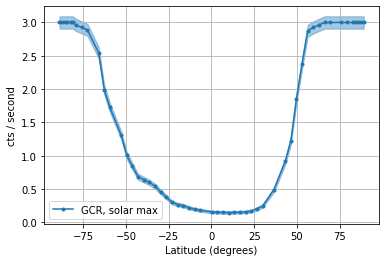

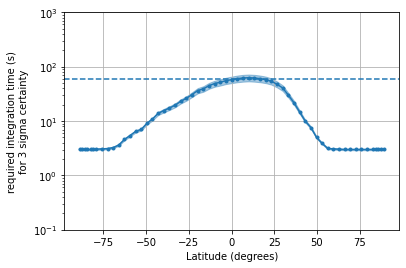

In [60]:
GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                           datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                                           input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                           threshold_photon_value=20.0, 
                                           label = "GCR, solar max")
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


(0.1, 10000.0)

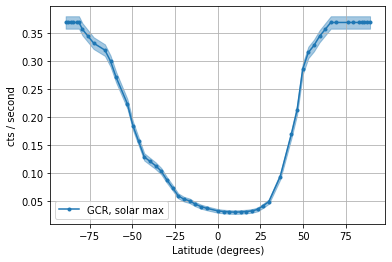

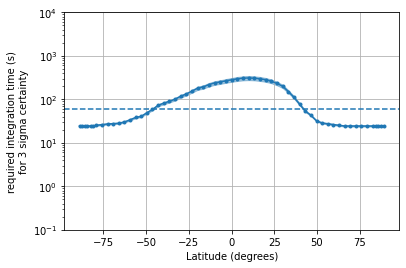

In [61]:
alpha_GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max,
                                            input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0,
                                            label = "GCR, solar max",
                                            atomic_number_for_cosmic_rays = 2)
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
alpha_GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")
plt.ylim([1e-1,1e4])

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


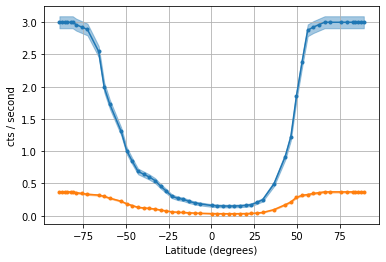

In [62]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_10110/3014460513.py:6: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f68fc527910> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["GCR proton","_","GCR alpha","_","CXB","albedo"])
/tmp/ipykernel_10110/3014460513.py:6: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f68fc4bca30> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["GCR proton","_","GCR alpha","_","CXB","albedo"])


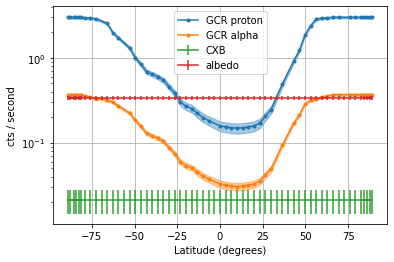

In [63]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")
albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

plt.legend(["GCR proton","_","GCR alpha","_","CXB","albedo"])

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


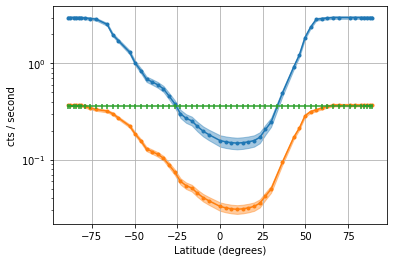

In [64]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

(albedo_photons_orbital_run + CXB_photons_orbital_run).plot_run_dict(xvalues_to_use="latitudes")

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


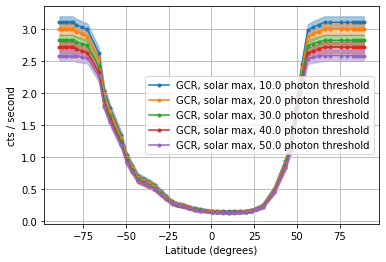

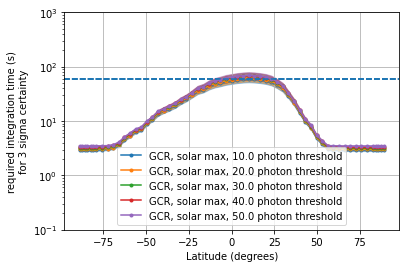

In [65]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,datetime_to_use=SRT.datetime_for_GCR_solar_max, input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], label = f"GCR, solar max, {photon_threshold} photon threshold", threshold_photon_value=photon_threshold).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,datetime_to_use=SRT.datetime_for_GCR_solar_max, input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], label = f"GCR, solar max, {photon_threshold} photon threshold", threshold_photon_value=photon_threshold).plot_int_time_array_vs_longitude_0()
plt.legend()

In [66]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

multi_rigidity_GLE21 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label="GLE21 protons",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

multi_rigidity_GLE05 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label="GLE05 protons",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


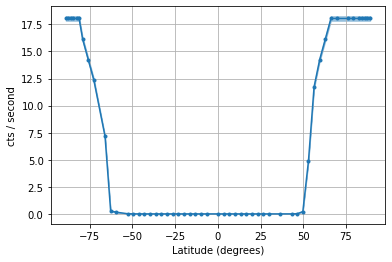

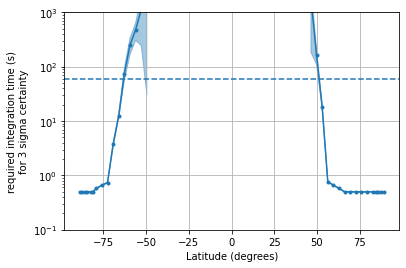

In [67]:
multi_rigidity_GLE21.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE21.plot_int_time_array_vs_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


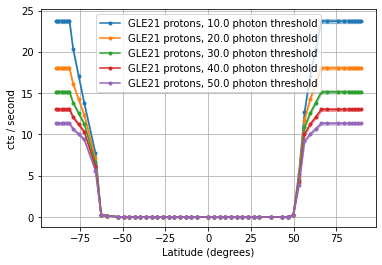

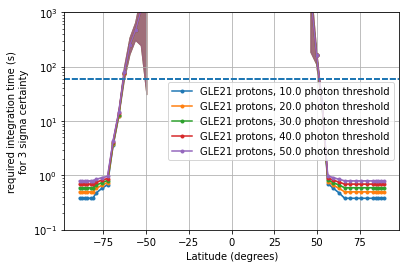

In [68]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


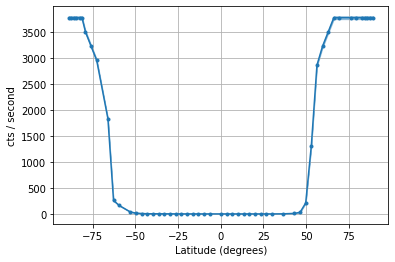

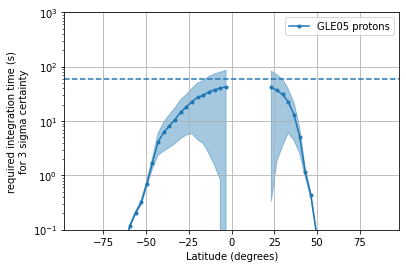

In [69]:
multi_rigidity_GLE05.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE05.plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


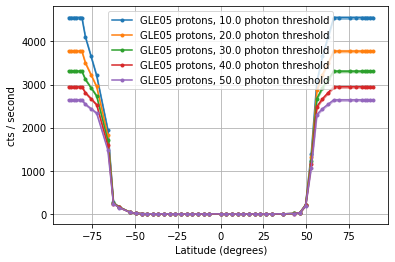

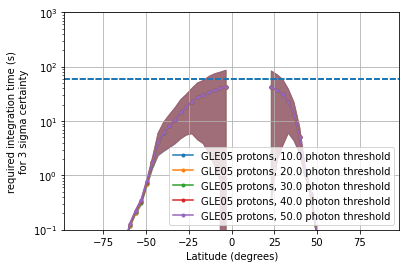

In [70]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

In [71]:
spacecraft_coords_DF

,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


In [72]:
def soft_divide(numerator, denominator):

    try:
        return numerator / denominator
    except ZeroDivisionError:
        return ufloat(0.0,0.0)

In [73]:
def calculate_int_time_functional(x_value, signal_flux_func, list_of_background_flux_functions, sigma=3):

    signal_flux = signal_flux_func(x_value)
    signal_flux_modified = np.array([(signal if signal.n != 0.0 else ufloat(np.nan,np.nan)) for signal in signal_flux])

    numerator = (signal_flux_modified + sum([background_flux_func(x_value) for background_flux_func in list_of_background_flux_functions]))

    return (sigma**2) * numerator / (signal_flux_modified**2) 

In [74]:
def plot_world_map():
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    worldmap.plot(color="lightgrey", ax=ax)

In [75]:
def long_east_to_west(longitude_east):

    if longitude_east > 180:
        output_longitude = longitude_east - 360.0
    else:
        output_longitude = longitude_east

    return output_longitude

In [76]:
class full_orbit_background():

    def __init__(self, 
                 DF_of_coordinates:pd.DataFrame, 
                 list_of_multi_rigidity_runs = [],
                 list_of_orbit_background_runs = [],
                 label=None,
                 datetime_for_rigidities = SRT.datetime_for_GCR_solar_max):

        self.DF_of_coordinates = DF_of_coordinates
        self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index
        self.list_of_multi_rigidity_runs = list_of_multi_rigidity_runs
        self.list_of_orbit_background_runs = list_of_orbit_background_runs
        self.label = label

        self.rigidities_for_coordinates = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = DF_of_coordinates[["Latitude_deg","Longitude_deg"]].values,
                                            dateAndTime=datetime_for_rigidities,cache=True)
        self.rigidities_for_coordinates = self.rigidities_for_coordinates[
            #np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -81.194370) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 72.753770) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -56.147930) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -69.295260) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 39.842640) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 42.992710) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -3.229399) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 33.233800)]  
        self.rigidities_for_coordinates.iloc[5] = self.rigidities_for_coordinates.iloc[4]

        self.rig_interp_list = []
        for multi_rigidity_run in list_of_multi_rigidity_runs:
            count_rate_DF = pd.DataFrame(self.rigidities_for_coordinates["Reffective"].copy())
            count_rate_DF["count_rate"] = multi_rigidity_run.rig_interp(count_rate_DF["Reffective"])

            list_of_sub_coordinates = []
            for index, row in count_rate_DF.reset_index().iterrows():
                relevant_coord = self.DF_of_coordinates[self.DF_of_coordinates["Latitude_deg"] == row["initialLatitude"]]
                list_of_sub_coordinates.append(relevant_coord)
            DF_of_sub_coordinates = pd.concat(list_of_sub_coordinates).reset_index()
            count_rate_DF = pd.concat([count_rate_DF.reset_index(),DF_of_sub_coordinates],axis=1).sort_values(by="index")
            count_rate_DF.label = multi_rigidity_run.label

            self.rig_interp_list.append(count_rate_DF)


        self.dict_of_interp_functions = {}
        dict_index = 0
        for interped_rig in self.rig_interp_list:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=interped_rig["index"],y=interped_rig["count_rate"])
            self.dict_of_interp_functions[dict_index].label = interped_rig.label
            dict_index += 1

        for orbit_background_run in self.list_of_orbit_background_runs:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=orbit_background_run.run_dict_event_counts.index,
                                                            y=orbit_background_run.run_dict_event_counts.values)
            self.dict_of_interp_functions[dict_index].label = orbit_background_run.label
            dict_index += 1

    def plot_cosmic_particles(self, xcol_to_plot_against="orbital_step", indicies=":", error_bar_function=plt.errorbar):

        if indicies == ":":
            rig_interp_list = self.rig_interp_list
        else:
            rig_interp_list = [self.rig_interp_list[indicies]]
        
        for interped_rig in rig_interp_list:
            #interped_rig.plot("index","count_rate",ax=plt.gca())
            error_bar_function(interped_rig[xcol_to_plot_against],
                     interped_rig["count_rate"].apply(lambda x:x.n),
                     interped_rig["count_rate"].apply(lambda x:x.std_dev),
                     label=interped_rig.label)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_count_rates(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        for orbit_background_run in self.list_of_orbit_background_runs:
            orbit_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_cosmic_vs_trapped(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        first_sum = True
        for orbit_background_run in self.list_of_orbit_background_runs:
            if first_sum is True:
                total_background_run = orbit_background_run
                first_sum=False
            else:
                total_background_run = total_background_run + orbit_background_run
                
        total_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        if xcol_to_plot_against is "Latitude_deg":
            plt.xlabel("Latitude (degrees)")
        else:
            plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_int_time(self, signal_index=0, xcol_to_plot_against="orbital_step"):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates[xcol_to_plot_against]

        #plt.plot(self.DF_of_coordinates.index, output_int_time_values)
        # plt.errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
        #              [time_value.n for time_value in output_int_time_values],
        #              [time_value.std_dev for time_value in output_int_time_values])
        
        fill_between_errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
                     [time_value.n for time_value in output_int_time_values],
                     [time_value.std_dev for time_value in output_int_time_values],
                     label=signal_interp_function.label)

        plt.axhline(60,ls="--")
        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid(True)
        plt.legend()

        #return output_int_time_values

    def plot_spacecraft_trajectory(self):

        plot_world_map()

        self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)

        sns.scatterplot(data=self.DF_of_coordinates,x="Longitude_east_deg",y="Latitude_deg")

    def get_count_rate_info(self, signal_index=0):

        print(f"polar count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_polar]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"horns count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_horns_max]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"SAA count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_SAA_max]['count_rate'].iloc[0]}".replace("+/-","±"))

    
    def get_int_time_info(self, signal_index=0, account_for_background=True):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        if account_for_background==True:
            background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]
        else:
            background_interp_function_list = [lambda x:0]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates["orbital_step"]

        print(f"polar int time is: {output_int_time_values[xvals_to_plot_against == index_for_polar][0]}".replace("+/-","±"))
        print(f"horns int time is: {output_int_time_values[xvals_to_plot_against == index_for_horns_max][0]}".replace("+/-","±"))
        print(f"SAA int time is: {output_int_time_values[xvals_to_plot_against == index_for_SAA_max][0]}".replace("+/-","±"))

<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_10110/1913410967.py:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if xcol_to_plot_against is "Latitude_deg":


In [77]:
default_trajectory_DF = spacecraft_coords_DF.iloc[790:850]
default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)

/tmp/ipykernel_10110/3269862290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)


/tmp/ipykernel_10110/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_10110/1913410967.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


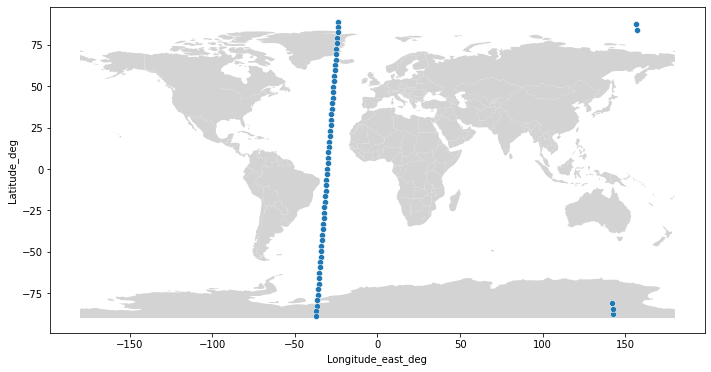

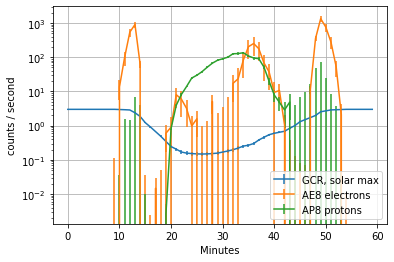

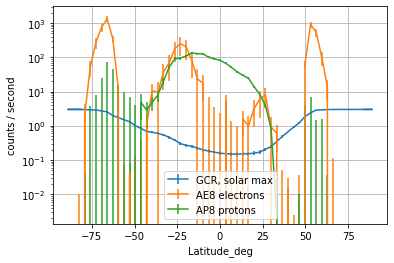

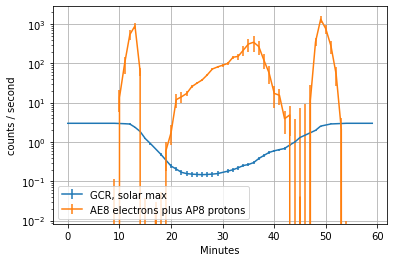

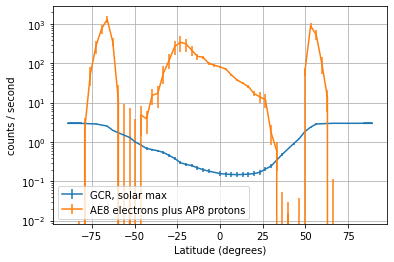

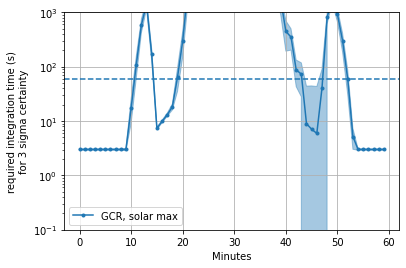

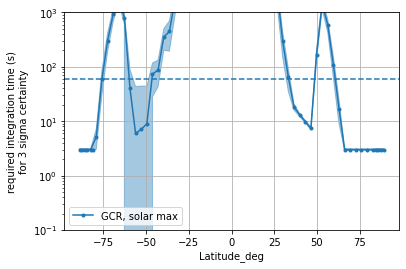

In [78]:
GCR_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
GCR_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg")
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")


In [79]:
GCR_orbit_background.rigidities_for_coordinates.iloc[5]

Rlower        0.0
Reffective    0.0
Rupper        0.0
Name: (-81.19437, 142.104739), dtype: float64

In [80]:
GCR_orbit_background.rigidities_for_coordinates.reset_index().index

RangeIndex(start=0, stop=54, step=1)

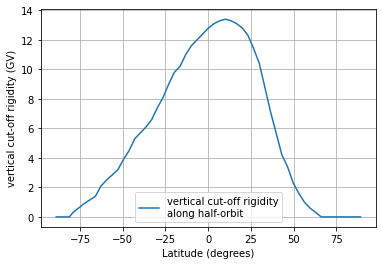

In [81]:
plt.plot(GCR_orbit_background.rigidities_for_coordinates.reset_index()["initialLatitude"], #.index,
         GCR_orbit_background.rigidities_for_coordinates["Reffective"], label="vertical cut-off rigidity\nalong half-orbit")
plt.grid(True)
plt.ylabel("vertical cut-off rigidity (GV)")
plt.xlabel("Latitude (degrees)")
plt.legend()

/tmp/ipykernel_10110/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_10110/1913410967.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


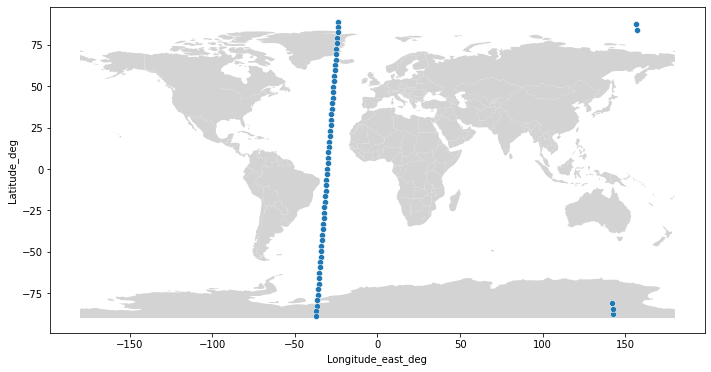

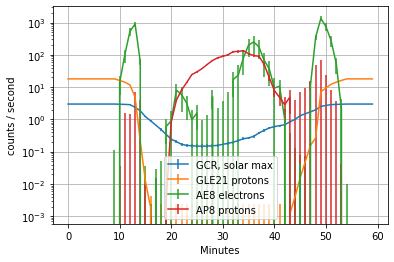

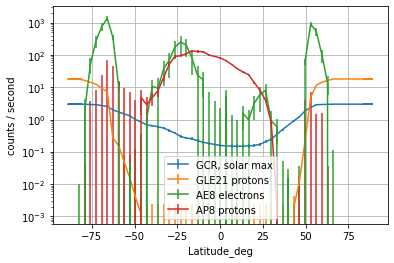

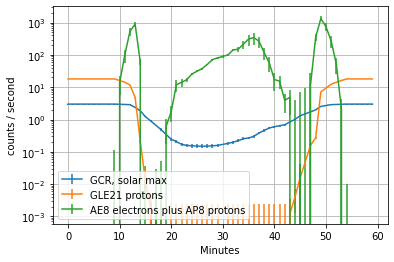

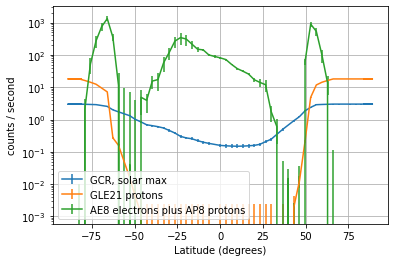

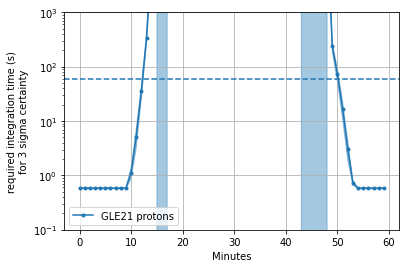

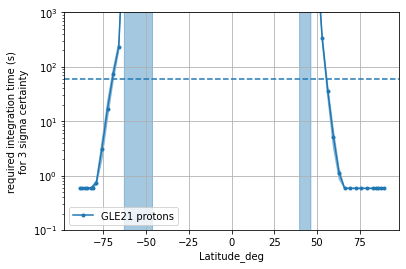

In [82]:
GLE21_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE21],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
GLE21_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

/tmp/ipykernel_10110/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_10110/1913410967.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


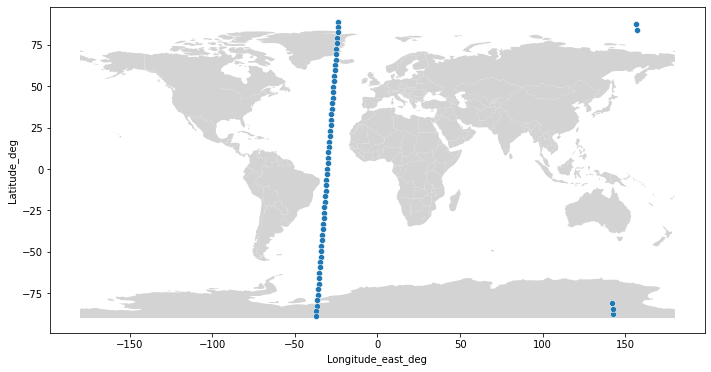

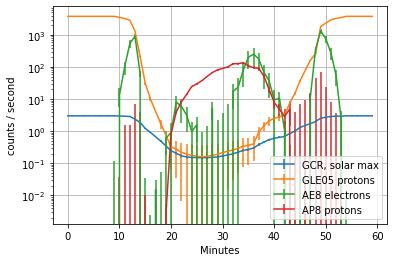

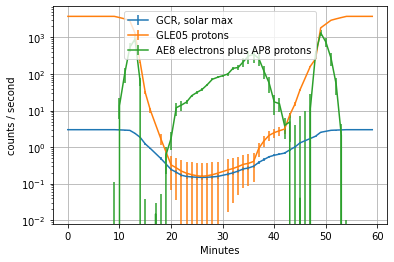

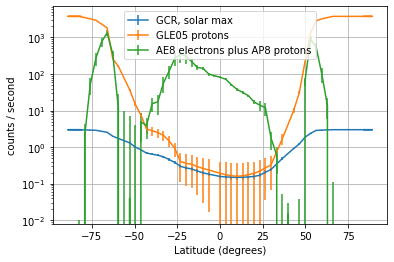

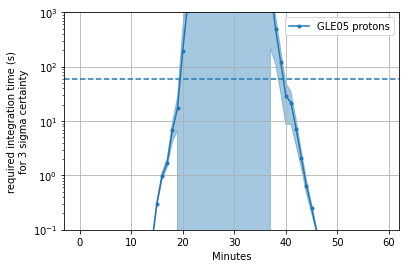

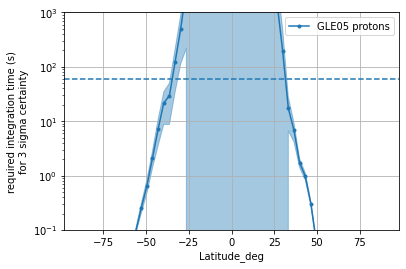

In [83]:
GLE05_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE05],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])

GLE05_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE05_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

In [84]:
dir(GLE21_orbit_background)

['DF_of_coordinates',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dict_of_interp_functions',
 'get_count_rate_info',
 'get_int_time_info',
 'label',
 'list_of_multi_rigidity_runs',
 'list_of_orbit_background_runs',
 'plot_cosmic_particles',
 'plot_cosmic_vs_trapped',
 'plot_count_rates',
 'plot_int_time',
 'plot_spacecraft_trajectory',
 'rig_interp_list',
 'rigidities_for_coordinates']

(1e-05, 100000.0)

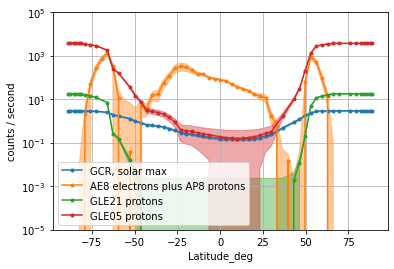

In [85]:
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

plt.ylim([1e-5,1e5])

running MAGNETOCOSMICS to acquire asymptotic directions...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


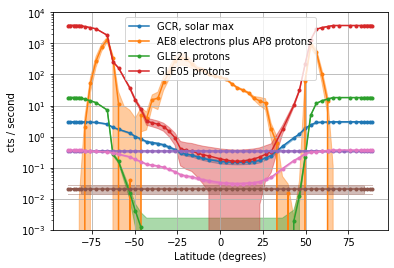

In [114]:
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

plt.ylim([1e-3,1e4])

plt.xlabel("Latitude (degrees)")

save_figure_for_paper("GLEs_output")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


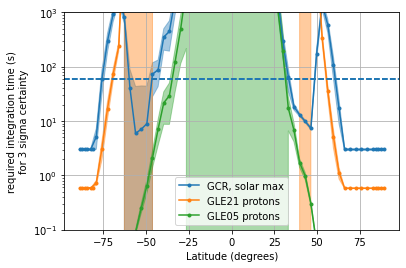

In [87]:
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

plt.xlabel("Latitude (degrees)")

save_figure_for_paper("GLEs_req_int_time")

background count rates and int time

In [88]:
GCR_orbit_background.get_count_rate_info(signal_index=0)

polar count rate is: 3.00±0.09
horns count rate is: 2.55±0.09
SAA count rate is: 0.300±0.029


In [89]:
GLE21_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 18.04±0.21
horns count rate is: 7.16±0.11
SAA count rate is: 0.0000±0.0024


In [90]:
GLE05_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 3774±28
horns count rate is: 1831±18
SAA count rate is: 0.41±0.29


In [91]:
GLE05_orbit_background.rig_interp_list[1][GLE05_orbit_background.rig_interp_list[1]['index'] == index_for_polar]['count_rate'].iloc[0]

3774.3842305470366+/-28.1357254077633

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


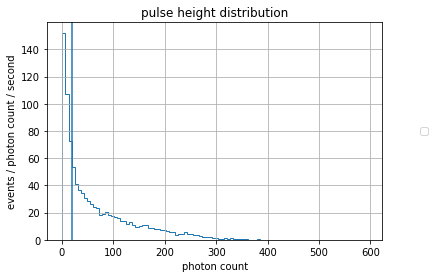

In [92]:
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].plot_pulse_height_distribution()
plt.axvline(20)

In [93]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0)

2.999121475754176+/-0.09326824123124307

In [94]:
print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))


7.01+/-0.06
5.988+/-0.032


5.461+/-0.018


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0001, 10000.0)

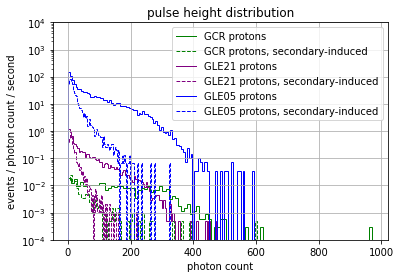

In [95]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

plt.legend([
    "GCR protons",
    "GCR protons, secondary-induced",
    "GLE21 protons",
    "GLE21 protons, secondary-induced",
    "GLE05 protons",
    "GLE05 protons, secondary-induced",
])

plt.ylim([1e-4,1e4])

In [96]:
SAA_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                             particle_species="proton",
                                             number_of_particles_to_simulate=10_000_000,label="AP8 protons",threshold_photon_value=20.0)

In [97]:
SAA_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                            particle_species="e-",
                                            label="AE8 electrons",
                                            threshold_photon_value=20.0, 
                                            number_of_particles_to_simulate=1_000_000)

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f68f1ab0e80>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f69043d8f70>, Cherenkov_run_label=None, number_of_particles=1000000)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
_____________________wrapper_gras_Cherenkov_runner_from_objects - 328.0s, 5.5min


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

In [98]:
horns_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max], 
                                            particle_species="e-",
                                            label="AE8 electrons",
                                            threshold_photon_value=20.0, 
                                            number_of_particles_to_simulate=1_000_000)

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f68f2400c40>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f69043d8f70>, Cherenkov_run_label=None, number_of_particles=1000000)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
_____________________wrapper_gras_Cherenkov_runner_from_objects - 323.1s, 5.4min


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


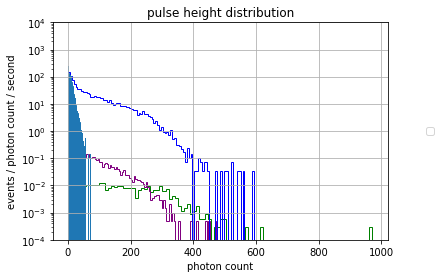

In [99]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="green")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="purple")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="blue")

SAA_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
#IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
#IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

plt.ylim([1e-4,1e4])
plt.yscale("log")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


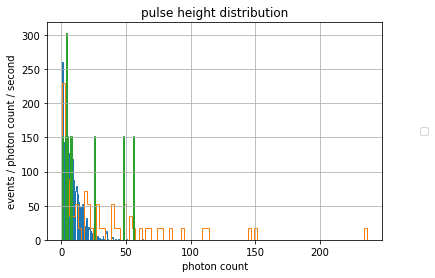

In [100]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

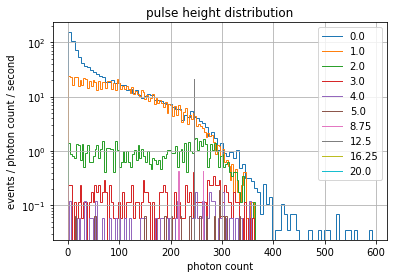

In [101]:
for rig_cut_off, rig_cut_off_run in GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs:
    rig_cut_off_run.plot_pulse_height_distribution()
#plt.axvline(20)
plt.yscale("log")
#plt.xscale("log")
plt.legend(GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[:,0])

In [102]:
GCR_orbit_background.get_int_time_info(signal_index=0)

polar int time is: 3.00±0.09
horns int time is: (1.9±0.4)e+03
SAA int time is: (3.4±1.6)e+04


In [103]:
GLE21_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.582±0.008
horns int time is: (2.4±0.4)e+02
SAA int time is: nan±nan


In [104]:
GLE05_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.002386±0.000018
horns int time is: 0.0085±0.0007
SAA int time is: (1.9±2.8)e+04


In [105]:
GCR_orbit_background.get_int_time_info(signal_index=0,account_for_background=False)

polar int time is: 3.00±0.09
horns int time is: 3.53±0.12
SAA int time is: 30.0±2.9


In [106]:
GLE21_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.499±0.006
horns int time is: 1.257±0.019
SAA int time is: nan±nan


In [107]:
GLE05_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.002384±0.000018
horns int time is: 0.00492±0.00005
SAA int time is: 22±16


In [108]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.33±0.25)e+03 cts/s
SAA region count rate: (3.5±1.4)e+02 cts/s
